In [1]:
#Importing libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
import os

# Path to the dataset
dataset_path = "/kaggle/input/new-plant-diseases-dataset/"

# Find the train directory
train_dir = None
for dirname, _, filenames in os.walk(dataset_path):
    if 'train' in dirname:
        train_dir = dirname
        break  # Stop after finding the first train directory

if train_dir:
    print(f"Training directory found: {train_dir}")
else:
    print("No training directory found.")

Training directory found: /kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train


In [20]:
size=224

In [24]:
train='/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/'

train_generator=tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=90,
    width_shift_range=0.0,
    height_shift_range=0.0,
    shear_range=0.0,
    zoom_range=0.0,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=1/255.0,
    preprocessing_function=None,
    validation_split=0.1,
).flow_from_directory(train,
                      batch_size=164,
                      target_size=(size,size),
                      subset="training",
                      color_mode='rgb', #"rgb", "rgba", or "grayscale"
                      class_mode='categorical',  # Use 'binary', 'sparse','categorical' or None as needed
                      shuffle=True)

Found 63282 images belonging to 38 classes.


In [25]:
train_generator.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

In [4]:
#Data Preprocessing
#Training Image preprocessing
training_set = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


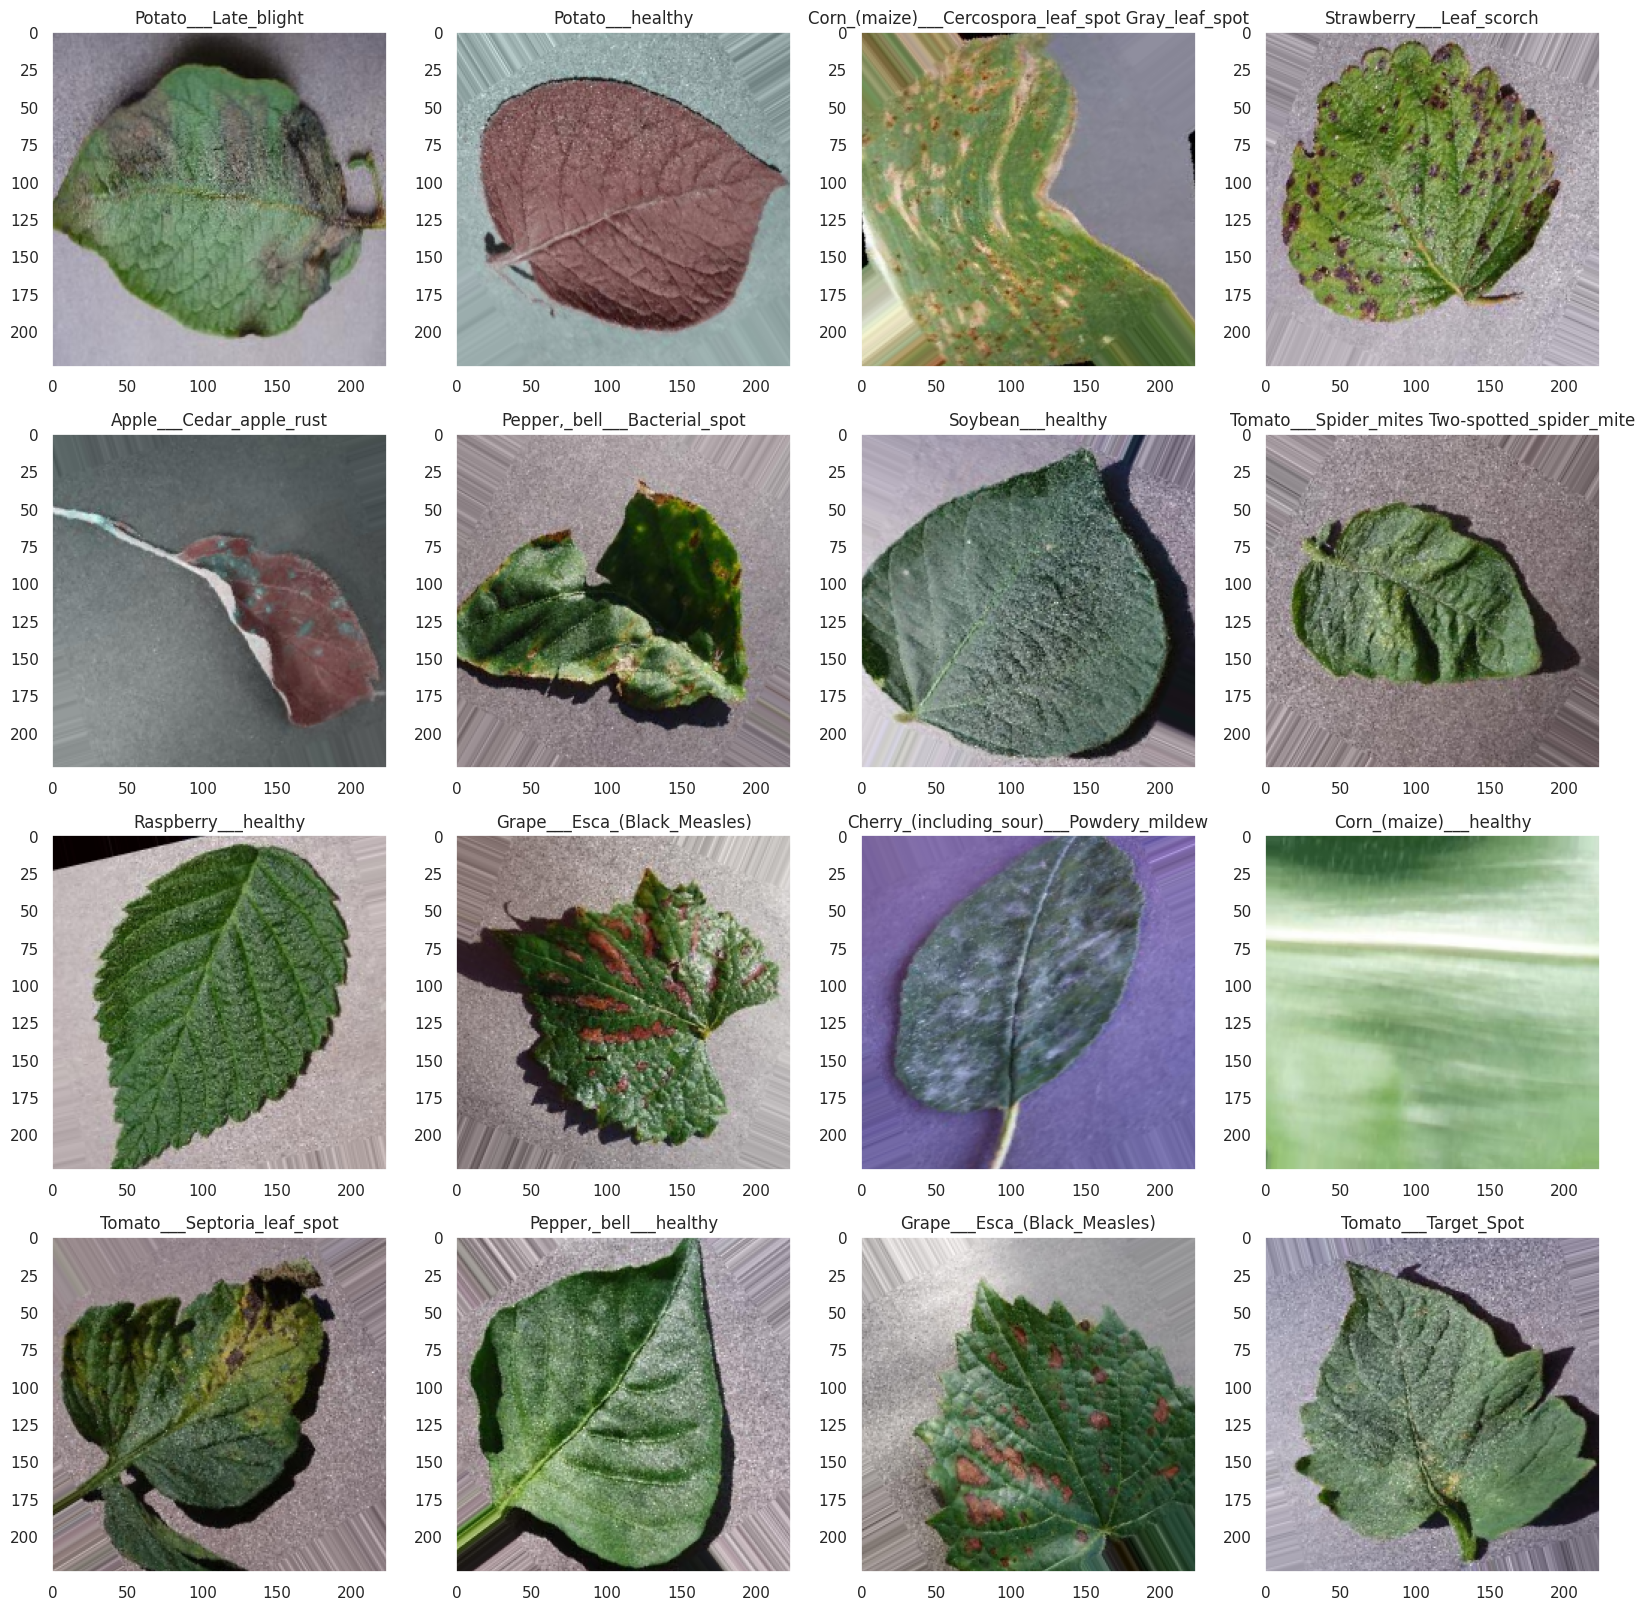

In [27]:
#let's display some images from training set
import numpy as np
classes=list(train_generator.class_indices.keys())
plt.figure(figsize=(20,20))
for X_batch, y_batch in train_generator:
    # create a grid of 3x3 images
    for i in range(0,16):
        plt.subplot(4,4,i+1)
        plt.imshow(X_batch[i])
        plt.title(classes[np.where(y_batch[i]==1)[0][0]])   # when y is categorical
        # plt.title(classes[int(y_batch[i])])   # when y is binary or sparse
        plt.grid(None)
    # show the plot
    plt.show()
    break


In [7]:
#Validation Image Preprocessing
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [8]:
test='/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'
test_generator=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.0,
    preprocessing_function=None,
).flow_from_directory(test,
                      batch_size=164,
                      target_size=(224,224),
                      color_mode='rgb', #"rgb", "rgba", or "grayscale"
                      class_mode='categorical',  # Use 'binary', 'sparse','categorical' or None as needed
                      shuffle=False)

Found 17572 images belonging to 38 classes.


In [9]:
test_generator.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

In [10]:
from tensorflow import keras

cnn = keras.models.Sequential()  # To build NN

# Add Input layer
cnn.add(tf.keras.Input(shape=(128, 128, 3)))

# Add convolutional layers
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(tf.keras.layers.Dropout(0.25))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))


In [11]:
import tensorflow as tf

# Compile the CNN model with the standard Adam optimizer
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy'])
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 155s 64ms/step - accuracy: 0.4092 - loss: 2.0758 - val_accuracy: 0.8259 - val_loss: 0.5500
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 120s 55ms/step - accuracy: 0.8314 - loss: 0.5331 - val_accuracy: 0.9087 - val_loss: 0.2846
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 122s 55ms/step - accuracy: 0.9009 - loss: 0.3080 - val_accuracy: 0.9322 - val_loss: 0.2151
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 121s 55ms/step - accuracy: 0.9319 - loss: 0.2016 - val_accuracy: 0.9434 - val_loss: 0.1742
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 121s 55ms/step - accuracy: 0.9492 - loss: 0.1516 - val_accuracy: 0.9525 - val_loss: 0.1542
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 121s 55ms/step - accuracy: 0.9612 - loss: 0.1160 - val_accuracy: 0.9471 - val_loss: 0.1686
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 121s 55ms/step - accuracy: 0.9692 - loss: 0.0955 - val_accuracy: 0.9380 - val_loss: 0.2057
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 121s 55ms/step - accuracy: 

In [28]:
#Evaluating Model
#TRAINING SET ACCURACY
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)
#VALIDATION SET ACCURACY
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)
#Saving Model
cnn.save('CNN_plantdiseases_model.keras')

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 30s 13ms/step - accuracy: 0.9859 - loss: 0.0431
Training accuracy: 0.9872964024543762
550/550 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.9603 - loss: 0.1405
Validation accuracy: 0.9611882567405701


In [16]:
training_history.history #Return Dictionary of history


{'accuracy': [0.6061170697212219,
  0.857258677482605,
  0.9115299582481384,
  0.9372501373291016,
  0.9527847170829773,
  0.9639661312103271,
  0.9712070822715759,
  0.9748915433883667,
  0.9796571731567383,
  0.9808094501495361],
 'loss': [1.3331350088119507,
  0.45300406217575073,
  0.2758174538612366,
  0.18867701292037964,
  0.14172673225402832,
  0.10914909839630127,
  0.08851603418588638,
  0.07660315930843353,
  0.06320621073246002,
  0.0578334778547287],
 'val_accuracy': [0.8259162306785583,
  0.9086614847183228,
  0.9322217106819153,
  0.9434327483177185,
  0.952481210231781,
  0.9470748901367188,
  0.9380264282226562,
  0.9585704803466797,
  0.9693831205368042,
  0.9611882567405701],
 'val_loss': [0.5499843955039978,
  0.2845994234085083,
  0.21506893634796143,
  0.17418840527534485,
  0.1542382687330246,
  0.1686040312051773,
  0.20568355917930603,
  0.13968609273433685,
  0.10636790096759796,
  0.13655313849449158]}

In [17]:
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [18]:
print(training_history.history.keys())


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


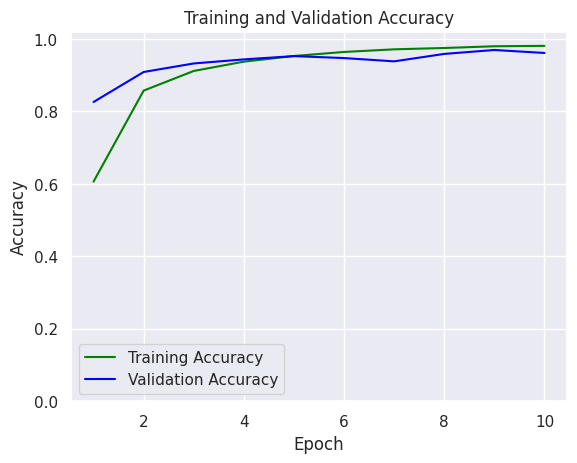

In [19]:
epochs = [i for i in range(1,11)]

plt.plot(epochs, training_history.history['accuracy'], color='green', label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.ylim(0,1.02)
plt.show()